# **Conceptos Necesarios**

$\hspace{0.5cm}$

# Machine Learning

El aprendizaje automático (ML) es un subconjunto de la inteligencia artificial (IA) que implica el uso de algoritmos y modelos estadísticos para permitir que las computadoras realicen tareas sin estar programadas explícitamente para realizarlas. Básicamente, permite a las computadoras aprender y hacer predicciones o decisiones basadas en datos. El proceso comienza alimentando a la computadora con una gran cantidad de datos, después de lo cual utiliza estos datos para aprender patrones y tendencias, que luego pueden usarse para hacer predicciones sobre datos nuevos e invisibles. Se utiliza ampliamente en diversos campos, incluidos, entre otros, análisis de datos, procesamiento de lenguaje natural, reconocimiento de imágenes y vehículos autónomos.



In [1]:
!pip install pillow tensorflow numpy

## Preprocesamiento de las imagenes

In [10]:
from PIL import Image
import numpy as np
import glob

# Especificamos la ruta a las imágenes de color.
path_to_images = "/content/Colour/*"

# Inicializamos listas para almacenar imágenes, tanto las de escala de grises y las de color.
X_train = []
Y_train = []

for filename in glob.glob(path_to_images):
    with Image.open(filename) as img:
        # Cambia el tamaño de las imagenes a un tamaño fijo (en este caso, 256x256, incluso si ya tienen ese tamaño)
        img = img.resize((256, 256))

        # Convierte las imagenes a una matriz numpy y las normaliza
        img_array = np.array(img) / 255.0

        # Comprueba si tengo una imagen en escala de grises; de ser así, la convierte a RGB. (aunque no es lo que necesitamos, es solo una precaucion)
        if len(img_array.shape) == 2:
            img_array = np.stack([img_array]*3, axis=-1)

        # Si la imagen es RGBA, se convierte a RGB
        if img_array.shape[2] == 4:
            img_array = img_array[:, :, :3]

        # Creamos la versión en escala de grises de la imagen.
        gray_img_array = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140])
        gray_img_array = gray_img_array.reshape(256, 256, 1)

        X_train.append(gray_img_array)
        Y_train.append(img_array)

# Convertimos las listas en arreglos de numpy
X_train = np.array(X_train)
Y_train = np.array(Y_train)


## Entrenamiento de una pequeña red neuronal

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.models import Model

# Necesitamos crear un modelo simple similar a U-Net, que nos permite codificar una red neuronal sin mucho codigo.
def create_model(input_shape):
    input_img = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(input_img, x)
    return model

# Nuestro modelo asume que las imágenes de entrada son imágenes en escala de grises de 256x256
model = create_model((256, 256, 1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Planteamos que X_train es el conjunto de imágenes en escala de grises y Y_train es el conjunto de imágenes de color correspondientes.
model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.1)


Epoch 1/50
1/1 [==============================] - 42s 42s/step - loss: 0.0785 - val_loss: 0.0979
Epoch 2/50
1/1 [==============================] - 39s 39s/step - loss: 0.0768 - val_loss: 0.0889
Epoch 3/50
1/1 [==============================] - 40s 40s/step - loss: 0.0720 - val_loss: 0.0763
Epoch 4/50
1/1 [==============================] - 38s 38s/step - loss: 0.0798 - val_loss: 0.0797
Epoch 5/50
1/1 [==============================] - 37s 37s/step - loss: 0.0719 - val_loss: 0.0852
Epoch 6/50
1/1 [==============================] - 37s 37s/step - loss: 0.0694 - val_loss: 0.0846
Epoch 7/50
1/1 [==============================] - 38s 38s/step - loss: 0.0687 - val_loss: 0.0782
Epoch 8/50
1/1 [==============================] - 38s 38s/step - loss: 0.0664 - val_loss: 0.0666
Epoch 9/50
1/1 [==============================] - 39s 39s/step - loss: 0.0636 - val_loss: 0.0583
Epoch 10/50
1/1 [==============================] - 38s 38s/step - loss: 0.0594 - val_loss: 0.0549
Epoch 11/50
1/1 [============

1/1 [==============================] - 3s 3s/step


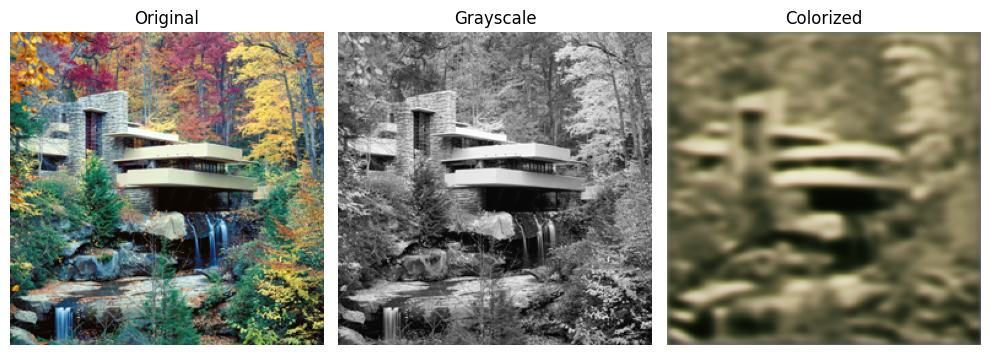

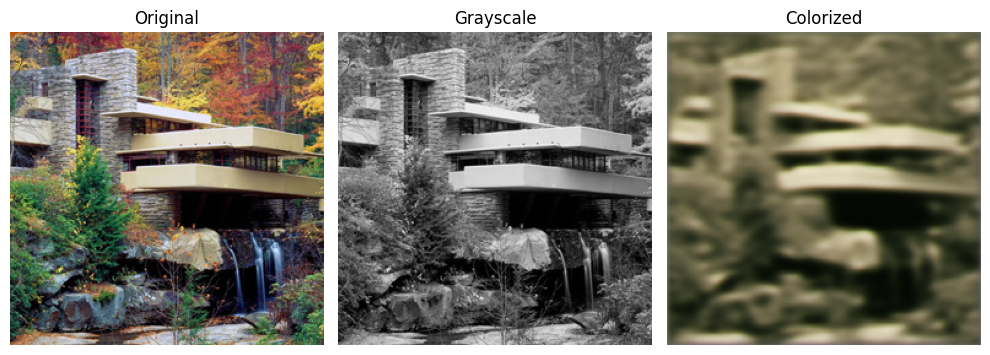

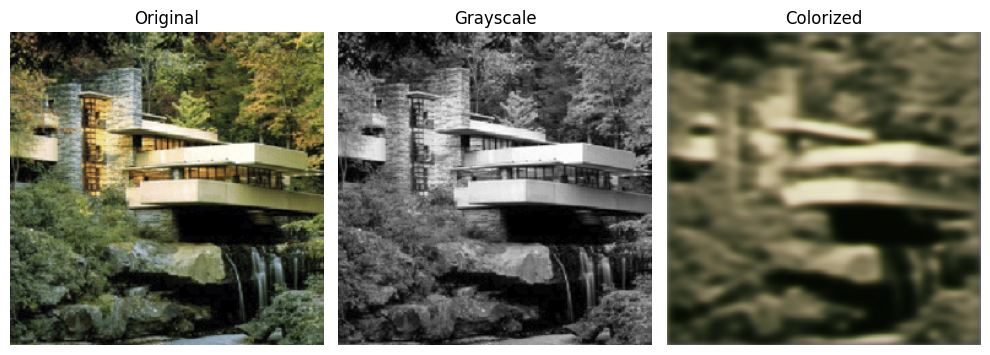

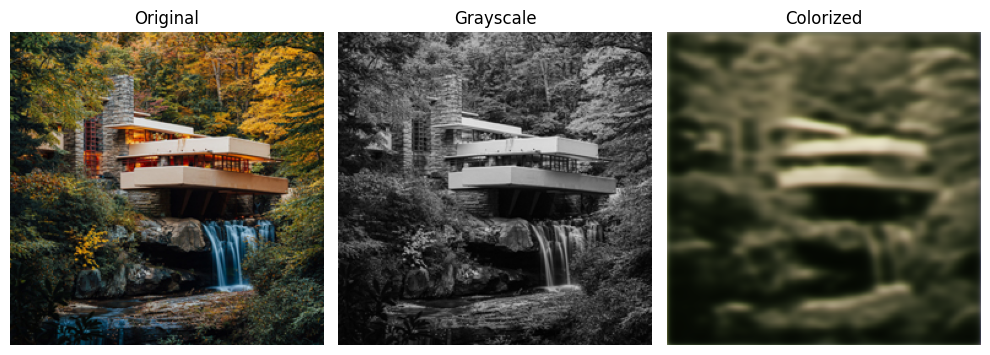

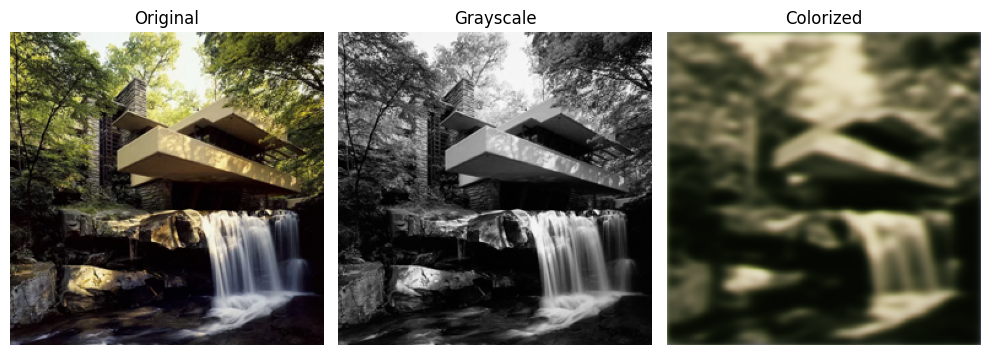

In [13]:
import matplotlib.pyplot as plt

# Choose a few test images (grayscale)
test_images = X_train[:5]

# Get the model's colorized versions of the test images
colorized_images = model.predict(test_images)

# Convert grayscale test images to RGB for visualization
test_images_rgb = [np.squeeze(np.stack([img]*3, axis=-1)) for img in test_images]

# Plot the original, grayscale, and colorized images side by side
for i in range(len(test_images)):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(Y_train[i])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_images_rgb[i], cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(colorized_images[i])
    plt.title("Colorized")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
